# Intro
Assuming:
- no nearest neighbor interactios (mean field/ homogenous saddle point)
- only non-zero chi is chi_AB

Developing a binding state calculator that takes into account how the chemical potential impacts the volume fractions of bound and unbound guests, which is needed for sf prefactors.

First set the unbound fraction of A and B
Then calculate the binding state along the backbone polymer
    currently have the p_A,j for an explicit backbone polymer. Need to incorporate probabilty distribution of marks
Then calculate Phi_A bound using the binding states
Finally calcualte chemical potential from phi bound and unbound

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm


## single $\phi_{Au}, \phi_{Bu}$ calc

In [3]:
b_A = 1
b_B = 1
b_P = 1
v_A = 1
v_B = 1
v_P = 1
N_P = 1000
N_A = 100
N_B = N_A

M = 51
e_A = 1
e_B = e_A

phi_Au = 0.05
phi_Bu = 0.05
phi_P = 0.4

chi_AB = 10/N_P

In [4]:
# for a given phi_U




p_markA = np.arange(0,1+1/M, 1/(M-1))  # probabilty of monomer j having mark A
p_markB = 1 - p_markA

p_AmAb = p_markA * phi_Au*np.exp(e_A) #A marked A bound
p_BmAb = p_markB * phi_Au #B marked A bound
p_AmBb = p_markA * phi_Bu #A marked B bound
p_BmBb = p_markB * phi_Bu*np.exp(e_B) #B marked B bound

q = 1 + p_AmAb + p_BmAb + p_AmBb + p_BmBb
s_Aj = (1*p_AmAb + 1*p_BmAb) / q
s_Bj = (1*p_AmBb + 1*p_BmBb) / q

Text(0, 0.5, 's')

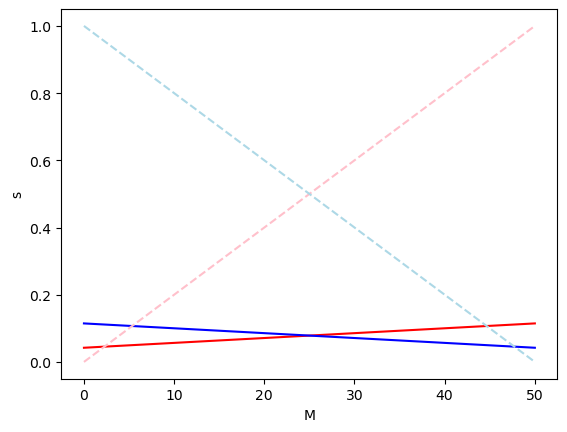

In [5]:
plt.plot(np.arange(0, M, 1), s_Aj, color = "red")
plt.plot(np.arange(0, M, 1), s_Bj, color = "blue")

plt.plot(np.arange(0, M, 1), p_markA, linestyle = "--", color = "pink")
plt.plot(np.arange(0, M, 1), p_markB, linestyle = "--", color = "lightblue")
plt.xlabel("M")
plt.ylabel("s")

In [10]:
phi_Ab = ((N_A*v_A)/ (N_P*v_P)) * phi_P * np.sum(s_Aj)
phi_Bb = ((N_B*v_B)/ (N_P*v_P)) * phi_P * np.sum(s_Bj)

print("$\phi_A^{(B)}, \phi_B^{(B)} $:", phi_Ab, phi_Bb)

$\phi_A^{(B)}, \phi_B^{(B)} $: 0.15990397164762213 0.15990397164762218


In [12]:
mu_A = np.log(phi_Au) + v_A*N_A*chi_AB*(phi_Bb+phi_Bu)
mu_B = np.log(phi_Bu) + v_B*N_B*chi_AB*(phi_Ab+phi_Au)

print("$\mu_A, \mu_B :$", mu_A, mu_B)

$\mu_A, \mu_B :$ -2.7858283019063688 -2.7858283019063688


## array $\phi_{Au}, \phi_{Bu}$ calc

In [18]:
b_A = 1
b_B = 1
b_P = 1
v_A = 1
v_B = 1
v_P = 1
N_P = 1000
N_A = 100
N_B = N_A

M = 51
e_A = 1
e_B = e_A

phi_P = 0.4
chi_AB = 10/N_P

p_markA = np.arange(0,1+1/M, 1/(M-1))  # probabilty of monomer j having mark A
p_markB = 1 - p_markA

In [20]:
def binding_state_calc(p_markA, p_markB, phi_Au, phi_Bu, e_A, e_B):
    p_AmAb = p_markA * phi_Au*np.exp(e_A) #A marked A bound
    p_BmAb = p_markB * phi_Au #B marked A bound
    p_AmBb = p_markA * phi_Bu #A marked B bound
    p_BmBb = p_markB * phi_Bu*np.exp(e_B) #B marked B bound
    
    q = 1 + p_AmAb + p_BmAb + p_AmBb + p_BmBb
    s_Aj = (1*p_AmAb + 1*p_BmAb) / q
    s_Bj = (1*p_AmBb + 1*p_BmBb) / q
    return s_Aj, s_Bj

def calc_fas(s_bnd_A, s_bnd_B):
    # [sig_0, sig_A, sig_B, sig_AB] =  calc_sisjs(s_bnd_A, s_bnd_B) #[sig_0, sig_A, sig_B, sig_AB]
    sig_A = s_bnd_A
    sig_B = s_bnd_B
    sig_0 = 1 - s_bnd_A - s_bnd_B

    f_a = np.sum(sig_A) / (np.sum(np.ones(len(s_bnd_A))))
    f_b = np.sum(sig_B) / (np.sum(np.ones(len(s_bnd_A))))
    # f_ab = np.sum(sig_AB) / (np.sum(np.ones(len(s_bnd_A))))
    f_o = np.sum(sig_0) / (np.sum(np.ones(len(s_bnd_A))))
    return [f_a, f_b, f_o]

In [82]:
# need phi_Au, phi_Ab, s for a range of mu

phi_Au_arr = np.arange(0.001, 0.08, 0.01)
phi_Bu_arr = phi_Au_arr#np.arange(0.001, 0.05, 0.01)

num_pnts = len(phi_Au_arr)

phi_Au_mat = np.zeros((num_pnts,num_pnts))
phi_Bu_mat = np.zeros((num_pnts,num_pnts))
sA_mat = np.zeros((num_pnts,num_pnts, M))
sB_mat = np.zeros((num_pnts,num_pnts, M))
fA_mat = np.zeros((num_pnts,num_pnts))
fB_mat = np.zeros((num_pnts,num_pnts))
muA_mat = np.zeros((num_pnts,num_pnts))
muB_mat = np.zeros((num_pnts,num_pnts))
phi_Ab_mat = np.zeros((num_pnts,num_pnts))
phi_Bb_mat = np.zeros((num_pnts,num_pnts))
for i in range(len(phi_Au_arr)):
    for j in range(len(phi_Bu_arr)):
        phi_Au = phi_Au_arr[i]
        phi_Bu = phi_Bu_arr[j]
        phi_Au_mat[i,j] = phi_Au
        phi_Bu_mat[i,j] = phi_Bu   
        
        s_Aj, s_Bj = binding_state_calc(p_markA, p_markB, phi_Au, phi_Bu, e_A, e_B)   
        sA_mat[i,j] = s_Aj
        sB_mat[i,j] = s_Bj
        fA, fB, f0 = calc_fas(s_Aj, s_Bj)
        fA_mat[i,j] = fA
        fB_mat[i,j] = fB

        phi_Ab = ((N_A*v_A)/ (N_P*v_P)) * phi_P * np.sum(s_Aj)
        phi_Bb = ((N_B*v_B)/ (N_P*v_P)) * phi_P * np.sum(s_Bj)
        phi_Ab_mat[i,j] = phi_Ab
        phi_Bb_mat[i,j] = phi_Bb 

        # print("$\phi_A^{(B)}, \phi_B^{(B)} $:", phi_Ab, phi_Bb)
        mu_A = np.log(phi_Au) + v_A*N_A*chi_AB*(phi_Bb+phi_Bu)
        mu_B = np.log(phi_Bu) + v_B*N_B*chi_AB*(phi_Ab+phi_Au)
        muA_mat[i,j] = mu_A
        muB_mat[i,j] = mu_B

        if (phi_Au + phi_Ab + phi_Bu + phi_Bb + phi_P > 1):
            print("ERROR")
        # print("$\mu_A, \mu_B :$", mu_A, mu_B)

In [48]:
# visualize this

In [84]:
np.sum(sA_mat[3,2])

2.6768864287926197

In [86]:
phi_Au_mat

array([[0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001],
       [0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011],
       [0.021, 0.021, 0.021, 0.021, 0.021, 0.021, 0.021, 0.021],
       [0.031, 0.031, 0.031, 0.031, 0.031, 0.031, 0.031, 0.031],
       [0.041, 0.041, 0.041, 0.041, 0.041, 0.041, 0.041, 0.041],
       [0.051, 0.051, 0.051, 0.051, 0.051, 0.051, 0.051, 0.051],
       [0.061, 0.061, 0.061, 0.061, 0.061, 0.061, 0.061, 0.061],
       [0.071, 0.071, 0.071, 0.071, 0.071, 0.071, 0.071, 0.071]])

In [88]:
phi_Ab_mat

array([[0.0037786 , 0.00371497, 0.0036536 , 0.00359437, 0.00353717,
        0.00348188, 0.0034284 , 0.00337664],
       [0.04075475, 0.04007981, 0.03942857, 0.0387997 , 0.03819202,
        0.03760439, 0.03703579, 0.03648525],
       [0.07632085, 0.0750774 , 0.07387699, 0.07271728, 0.07159611,
        0.07051146, 0.06946148, 0.06844442],
       [0.11056032, 0.10878762, 0.10707546, 0.10542058, 0.10381998,
        0.10227085, 0.1007706 , 0.09931681],
       [0.14354984, 0.14128399, 0.13909452, 0.13697735, 0.13492872,
        0.13294515, 0.13102338, 0.12916038],
       [0.17536008, 0.17263434, 0.16999929, 0.16745016, 0.16498252,
        0.16259226, 0.16027557, 0.15802888],
       [0.20605628, 0.20290132, 0.19985   , 0.19689693, 0.19403712,
        0.19126589, 0.18857893, 0.18597219],
       [0.23569876, 0.23214291, 0.22870243, 0.22537138, 0.22214424,
        0.21901588, 0.21598152, 0.2130367 ]])

In [90]:
fA_mat

array([[0.00185225, 0.00182106, 0.00179098, 0.00176195, 0.00173391,
        0.0017068 , 0.00168059, 0.00165522],
       [0.01997782, 0.01964697, 0.01932773, 0.01901946, 0.01872158,
        0.01843353, 0.0181548 , 0.01788493],
       [0.03741218, 0.03680265, 0.03621421, 0.03564573, 0.03509613,
        0.03456444, 0.03404974, 0.03355119],
       [0.05419624, 0.05332726, 0.05248797, 0.05167676, 0.05089215,
        0.05013277, 0.04939735, 0.04868471],
       [0.07036757, 0.06925686, 0.06818359, 0.06714576, 0.06614153,
        0.06516919, 0.06422715, 0.06331391],
       [0.08596083, 0.08462468, 0.08333298, 0.08208341, 0.08087378,
        0.07970209, 0.07856646, 0.07746514],
       [0.10100798, 0.09946143, 0.09796569, 0.0965181 , 0.09511623,
        0.09375779, 0.09244065, 0.09116284],
       [0.11553861, 0.11379555, 0.11210904, 0.11047617, 0.10889424,
        0.10736073, 0.1058733 , 0.10442976]])

In [92]:
muA_mat

array([[-6.90297668, -6.85600053, -6.81043443, -6.76619496, -6.72320544,
        -6.6813952 , -6.640699  , -6.60105652],
       [-4.50514504, -4.45878019, -4.41378261, -4.37007239, -4.32757601,
        -4.28622567, -4.24595869, -4.20671709],
       [-3.85857924, -3.81280427, -3.76835585, -3.72515738, -3.68313833,
        -3.64223355, -3.60238284, -3.56353041],
       [-3.4691737 , -3.42396837, -3.38005079, -3.33734749, -3.29579073,
        -3.25531792, -3.21587114, -3.17739669],
       [-3.18964604, -3.1449912 , -3.1015871 , -3.05936323, -3.01825449,
        -2.9782007 , -2.9391461 , -2.90103897],
       [-2.97144777, -2.92732526, -2.88441818, -2.84265879, -2.8019845 ,
        -2.76233738, -2.72366376, -2.68591376],
       [-2.79245301, -2.74884562, -2.70641994, -2.66511081, -2.62485804,
        -2.58560584, -2.54730249, -2.50989989],
       [-2.64069876, -2.59759015, -2.55563098, -2.5147586 , -2.47491502,
        -2.43604652, -2.39810321, -2.3610387 ]])

In [94]:
muB_mat

array([[-6.90297668, -4.50514504, -3.85857924, -3.4691737 , -3.18964604,
        -2.97144777, -2.79245301, -2.64069876],
       [-6.85600053, -4.45878019, -3.81280427, -3.42396837, -3.1449912 ,
        -2.92732526, -2.74884562, -2.59759015],
       [-6.81043443, -4.41378261, -3.76835585, -3.38005079, -3.1015871 ,
        -2.88441818, -2.70641994, -2.55563098],
       [-6.76619496, -4.37007239, -3.72515738, -3.33734749, -3.05936323,
        -2.84265879, -2.66511081, -2.5147586 ],
       [-6.72320544, -4.32757601, -3.68313833, -3.29579073, -3.01825449,
        -2.8019845 , -2.62485804, -2.47491502],
       [-6.6813952 , -4.28622567, -3.64223355, -3.25531792, -2.9782007 ,
        -2.76233738, -2.58560584, -2.43604652],
       [-6.640699  , -4.24595869, -3.60238284, -3.21587114, -2.9391461 ,
        -2.72366376, -2.54730249, -2.39810321],
       [-6.60105652, -4.20671709, -3.56353041, -3.17739669, -2.90103897,
        -2.68591376, -2.50989989, -2.3610387 ]])